In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [5]:
qpe_circuit = QuantumCircuit(4,3)

In [6]:
# initializing the input
qpe_circuit.clear()
qpe_circuit.x(3)
for i in range(3):
    qpe_circuit.h(i)


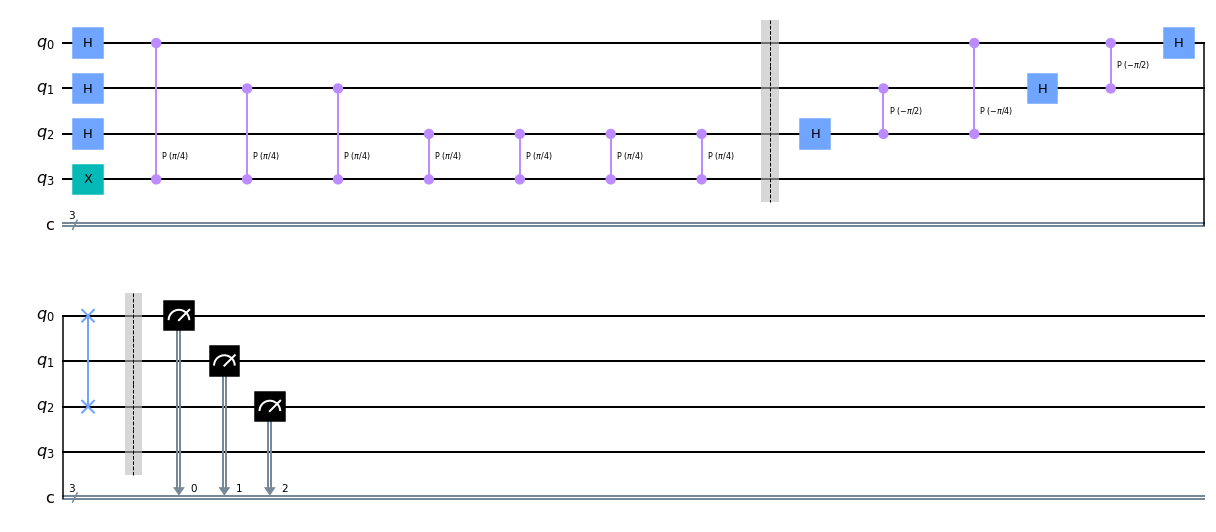

In [7]:
# using unitary rotation gates to estimate the phase of a eigenstate
# U^2^j where j is the no. of qubit according to this it will repeat the no.

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe_circuit.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe_circuit.barrier()

# Applying inverse QFT

#qpe_circuit = qpe_circuit.compose(QFT(3, inverse=True), [0,1,2])

qpe_circuit.h(2)
qpe_circuit.cp(-pi/2,2,1)
qpe_circuit.cp(-pi/4,2,0)
qpe_circuit.h(1)
qpe_circuit.cp(-pi/2,1,0)
qpe_circuit.h(0)
qpe_circuit.swap(0,2)

# Measure

qpe_circuit.barrier()
for n in range(3):
    qpe_circuit.measure(n,n)

qpe_circuit.draw('mpl')


### Running on simulator

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_qpe = transpile(qpe_circuit, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


001


In [20]:
# Converting the binary string to decimal

b_str = list(answer.keys())[0]
b = int(b_str,2)
print(b)

1


In [22]:
thetha = b/(2**n)
print(thetha)

0.25


### Running on quantum computer